# Mathematical Modelling for Machine Learning - individual project
Edoardo Ghirardo

### Importing the libraries and dataset

First, we start by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import seaborn as sns

from scipy.stats.distributions import nbinom

from matplotlib import pyplot as plt

from scipy.stats import shapiro

import pickle

Next, we import the dataset.

In [2]:
df = pd.read_csv('mldata_0003185254.csv')
df = df.drop(df.columns[0], axis=1)
df

,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
0,2,1.150716,-1.979973,0.680099,-0.135402,-0.390514,-2.405712,0.792967,0.154712,-0.983903,...,-0.268611,1.051953,1.308560,0.140152,0.372893,-0.063322,0.311749,0.010974,-0.647442,0.256313
1,1,-3.539467,-0.590726,0.654064,0.650917,-0.890558,-1.125392,-1.291114,0.721989,-2.256501,...,2.138726,7.210606,-1.322859,2.561216,-0.225016,-0.144404,-0.335757,0.003445,0.356483,-0.199252
2,2,2.496233,0.455439,0.886071,1.251760,-5.785248,-1.501152,1.196753,-0.234105,-0.769288,...,0.435137,1.404101,-0.837415,-0.445655,1.435118,-0.938077,0.804940,-0.008327,1.482628,-0.114670
3,0,5.367175,2.285384,-0.739692,-0.032436,-0.368303,0.759776,0.477517,0.805067,0.695353,...,0.439092,-3.622805,2.185190,-0.426252,1.259345,-0.059720,-0.352807,0.009295,-1.903380,-0.054236
4,4,1.093797,0.665140,-0.006392,1.444576,-4.601910,-0.611354,-1.416469,-1.249728,3.325293,...,0.842777,-0.856341,2.554771,2.101875,1.028894,-0.746199,2.062038,-0.003560,0.221132,0.045790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1.635066,-0.593142,0.055245,-0.245138,1.894360,-3.631211,1.035445,0.928225,-1.712362,...,0.867375,-4.021058,0.315848,-0.982917,0.554284,0.307170,0.435162,0.011133,0.394501,0.186060
996,3,4.150154,-0.385565,0.052481,-0.034260,-2.191776,0.106228,1.440935,-2.051189,4.644256,...,-0.103378,-0.908359,-2.891896,-0.857847,1.565695,-0.355396,0.482939,0.017345,-0.017310,0.557141
997,4,-1.905493,-2.514926,-0.658272,2.240321,-4.806536,-0.221222,-1.201947,0.647519,-0.276785,...,-0.235146,-0.450466,1.204718,1.547515,-0.679298,-0.779379,0.050612,-0.008368,2.871460,-0.386640
998,1,0.703461,1.795194,-0.664066,-0.906782,-2.521505,-1.489038,-1.640753,0.045308,2.319636,...,-1.208691,-2.140548,0.783738,-0.320711,-1.059784,-0.408861,1.469976,-0.007181,2.649690,0.433444


We drop the first column since it is just an index which is automatically added by pandas.

### Exploratory data analysis

First, we check the data types.

In [3]:
df.dtypes.value_counts()

float64    25
int64       1
Name: count, dtype: int64

We see that all of the features are float, while the label is int. We now see what the labels are.

In [4]:
categories = set(df['label'].tolist())
categories

{0, 1, 2, 3, 4}

We see that the label has 5 different categories. We will now see their frequencies, as well as the distributions of the features.

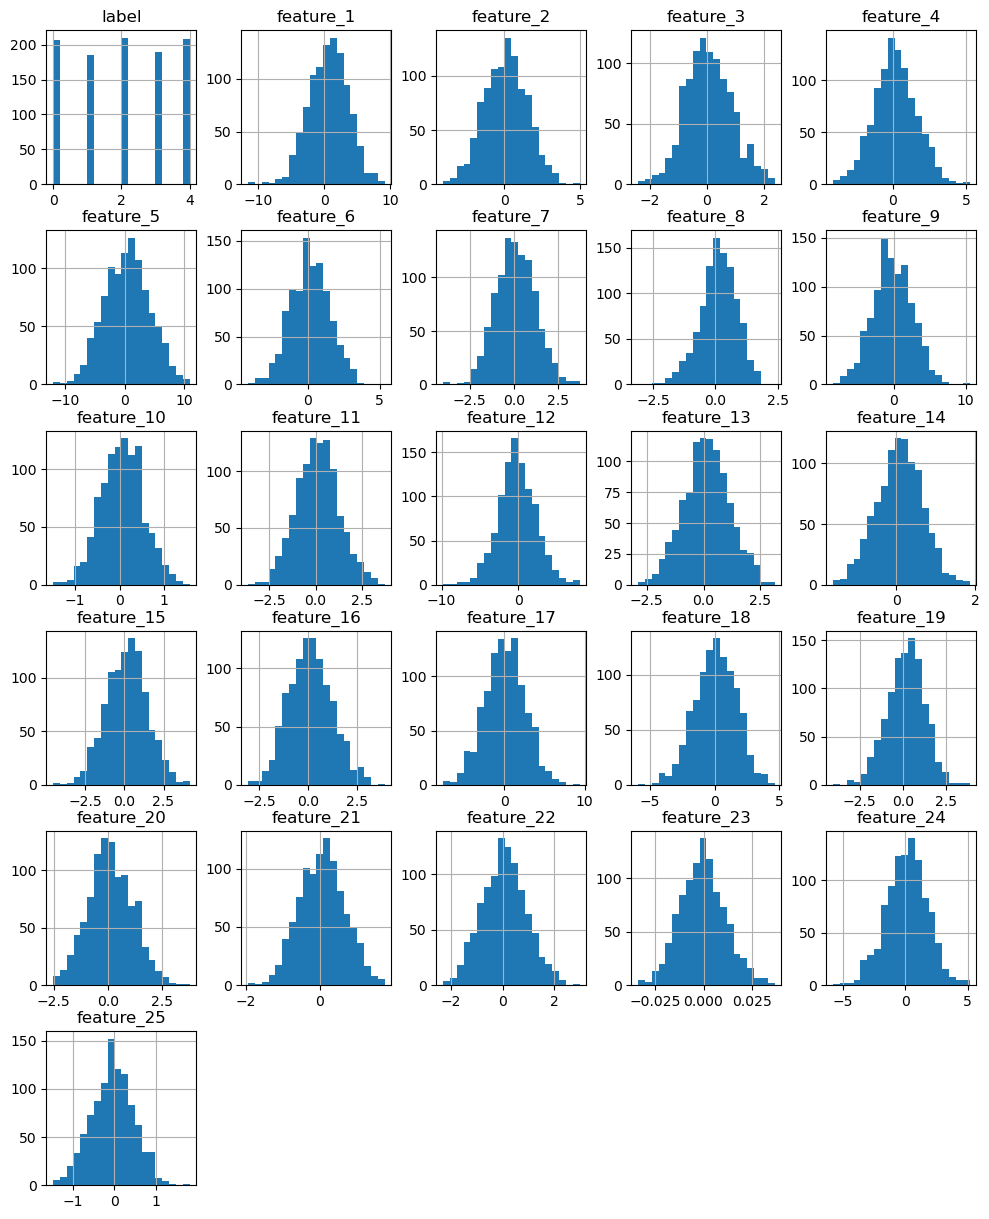

In [5]:
df.hist(figsize=(12, 15), bins = 20)
plt.show()

From the first plot we see that classes in the labels seem to be reasonably balanced. From the other plots, we see that all of the features have a reasonably symmetrical distribution centered at 0. We now look more closely at the distribution of the features.

In [6]:
features = df.columns[1:]
df[features].describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.660343,0.093895,0.076245,0.181574,0.456375,0.162480,0.087384,0.116960,-0.131196,0.055797,...,0.118531,0.103368,0.066994,0.181743,0.118458,0.074001,0.068845,-0.000318,0.122943,-0.035094
std,2.934933,1.393663,0.808569,1.448931,3.769820,1.366073,1.096741,0.732678,2.770569,0.468207,...,1.097682,2.493199,1.612731,1.074814,1.019715,0.611275,0.861596,0.011653,1.619636,0.504576
min,-11.532222,-4.033767,-2.406163,-4.065029,-11.965781,-4.144471,-4.006942,-3.103132,-8.373442,-1.490245,...,-3.062138,-7.580771,-5.933139,-4.025564,-2.531040,-1.940248,-2.307221,-0.033738,-5.745285,-1.469765
25%,-1.351154,-0.911299,-0.491929,-0.777858,-2.225125,-0.815622,-0.672994,-0.332541,-1.980739,-0.267165,...,-0.656232,-1.543647,-0.990248,-0.528655,-0.558754,-0.360803,-0.527697,-0.008375,-0.952841,-0.370934
50%,0.733105,0.123921,0.022427,0.129937,0.528646,0.138520,0.052359,0.145484,-0.162974,0.063096,...,0.089625,0.071465,0.091761,0.248130,0.080042,0.085720,0.056690,-0.000468,0.190395,-0.025852
75%,2.726784,1.081277,0.629038,1.096420,2.975034,1.085186,0.862380,0.615132,1.728881,0.372896,...,0.847019,1.732610,1.251746,0.885392,0.825079,0.482401,0.644179,0.007233,1.179326,0.292602
max,9.158484,4.948049,2.369256,5.248511,10.905251,5.333623,3.691371,2.373237,10.524955,1.565341,...,3.884304,9.361347,4.646262,3.865454,3.753761,1.768284,2.992137,0.036643,5.140422,1.817305


Like we noticed, the mean is very close to 0 for every feature, while the standard deviation varies. The min and the max for every feature seem to be quite symmetrical. We will now proceed to test the normality of the features.

In [7]:
non_normal = []
for feature in features:
    pvalue = shapiro(df[feature]).pvalue
    if pvalue <= 0.05:
        non_normal.append(feature)
non_normal

['feature_1',
 'feature_3',
 'feature_8',
 'feature_12',
 'feature_16',
 'feature_18',
 'feature_19']

With the Shapiro-Wilk test, only a few features show significant statistical evidence that they are not normally distributed. To further understand the data we now look at the outliers.

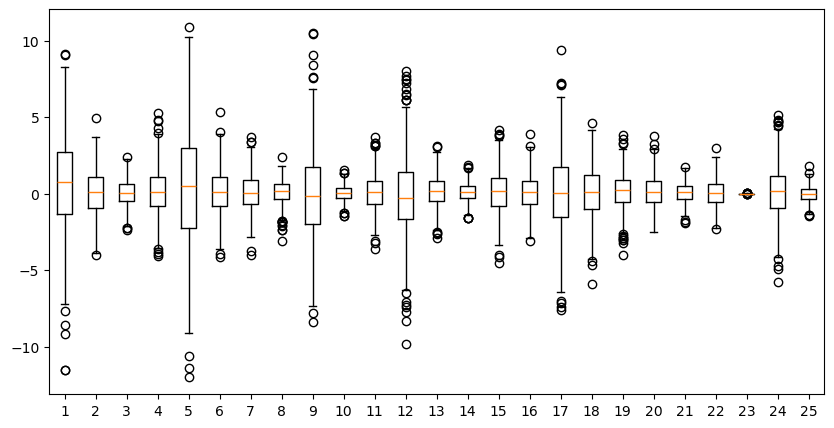

In [8]:
fig, axs = plt.subplots(1, figsize=(10,5))
plt.boxplot(df[features])
plt.show()

From the boxplot we see two main things: each feature is indeed very symmetric, with few outliers, and the variance changes a lot from feature to feature. For this reason we proceed with a rescaling of the data before visualizing it.

In [67]:
scaler = StandardScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)
normalized_df['label'] = df['label']
normalized_df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,label
0,0.167165,-1.488815,0.747192,-0.218875,-0.224762,-1.880923,0.643667,0.051551,-0.307927,1.403249,...,0.380660,0.770238,-0.038716,0.249640,-0.224762,0.282064,0.969498,-0.475891,0.577818,2
1,-1.431689,-0.491484,0.714976,0.324086,-0.357472,-0.943226,-1.257533,0.826189,-0.767484,-0.381610,...,2.852077,-0.862231,2.214954,-0.337001,-0.357472,-0.469831,0.323098,0.144265,-0.325501,1
2,0.625844,0.259549,1.002056,0.738974,-1.656510,-1.218430,1.012021,-0.479394,-0.230426,-0.938768,...,0.521974,-0.561074,-0.584019,1.291850,-1.656510,0.854765,-0.687568,0.839921,-0.157788,2
3,1.604530,1.573254,-1.009618,-0.147775,-0.218867,0.437454,0.355899,0.939637,0.298481,0.536476,...,-1.495283,1.314079,-0.565958,1.119389,-0.218867,-0.489630,0.825341,-1.251723,-0.037955,0
4,0.147762,0.410092,-0.102254,0.872114,-1.342456,-0.566749,-1.371888,-1.866266,1.248198,1.543601,...,-0.385123,1.543358,1.787373,0.893281,-1.342456,2.314530,-0.278326,0.060655,0.160380,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.332277,-0.493218,-0.025985,-0.294648,0.381637,-2.778467,0.864868,1.107813,-0.570986,-0.773645,...,-1.655098,0.154384,-1.084135,0.427614,0.381637,0.425373,0.983153,0.167751,0.438517,0
996,1.189655,-0.344201,-0.029405,-0.149035,-0.702812,-0.041199,1.234776,-2.960692,1.724498,0.456689,...,-0.405998,-1.835625,-0.967712,1.419967,-0.702812,0.480852,1.516527,-0.086638,1.174315,3
997,-0.874678,-1.872853,-0.908872,1.421584,-1.396763,-0.281020,-1.176190,0.724499,-0.052574,1.333473,...,-0.222249,0.705817,1.271341,-0.782724,-1.396763,-0.021173,-0.691133,1.697846,-0.697065,4
998,0.014699,1.221350,-0.916041,-0.751519,-0.790322,-1.209558,-1.576491,-0.097845,0.885038,-0.355203,...,-0.900465,0.444651,-0.467714,-1.156040,-0.790322,1.627018,-0.589201,1.560852,0.929042,1


We save the scaler to use it with our test dataset.

In [68]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

With our data normalized, we now do some dimensionality reduction to better visualize it.`

In [10]:
pca = PCA(n_components=3, svd_solver='full')
pca_df = pd.DataFrame(pca.fit_transform(normalized_df[features]))
pca_df['label'] = df['label']
pca_df

,0,1,2,label
0,-0.181370,-0.603764,0.377428,2
1,0.940228,-1.590380,-1.497313,1
2,1.840622,-1.117273,-0.801066,2
3,0.155016,0.130212,2.142824,0
4,2.413251,0.331436,0.805803,4
...,...,...,...,...
995,-1.537587,-0.565943,1.026725,0
996,1.082336,2.252084,0.435765,3
997,2.325498,-0.947280,-0.893139,4
998,1.707235,0.515955,-0.556676,1


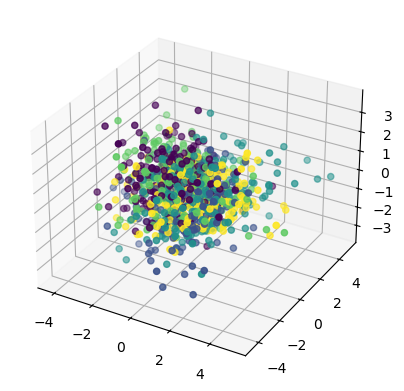

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_df[0], pca_df[1], pca_df[2], c=pca_df['label'])
plt.show()

We notice that at least in the 3-dimensional projection, the data is definitely not linearly separable.

### Training

Now we start with the training of the data. First we define an auxilliary function to load the dataset and divide it in train and test, as well as initialize the k-fold.

In [12]:
def load_dataset(dataset, target_name='Target', test_size=0.2):
    X = dataset.drop(columns=[target_name])
    y = dataset[target_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    kfold = KFold(n_splits=5, shuffle=True)
    return X, y, X_train, X_test, y_train, y_test, kfold

In [13]:
X, y, X_train, X_test, y_train, y_test, kfold = load_dataset(normalized_df, target_name='label', test_size=0.2)

We initialize an empty dict in which we will store all of the models.

In [14]:
models = {}

#### K-nearest neighbors

We will now start with a K-nearest neighbors clasifier. This algorithm does not require actual training, so the key to accuracy lies in the tuning of the hyperparameters.
The main hyperparameters are:
* number of neighbors: how many neighbors the algorithm will take into account for the classification. This is an integer number.
* weights: wether or not to weight the vote of each neighbor based on how far it is from the datapoint.
* metric/$p$: these two parameters are basically equivalent. The metric allows you to specify the actual metric to use when computing the k neighbors, such as Manhattan, Euclidean... while the $p$ parameter allows you to choose the power parameter for the more general Minkowski metric. Thus a $p=1$ will be equivalent to the Manhattan distance, $p=2$ to the Euclidean, and so on. We will tune this one as it is numeric.

In order to choose the optimal parameters, considering we have two numeric ones, with the p parameter being potentially unbounded, it is impossible to try all combinations. For this reason, we will use a "bayesian" approach:
* initialize a randomized search with a "prior distribution" for the numeric parameters, find the optimal parameters among the ones tried
* adjust the distribution of the numeric parameters such that the mean is the optimal parameter found earlier
* repeat $n$ times, and use the set of parameters with the highest score

In this specific case, we initialize the random search and we choose a negative binomial distribution because it allows us to control the support and the mean of the distribution easily. We then change the $n$ parameter in order for the mean to be the optimal parameter found, leaving $p$ unchanged to $0.5$ (thus we set $n=\text{optimal parameter} +1$)

In [20]:
knn = KNeighborsClassifier()

neighbors_param = 150
p_param = 20

neighbors_list = []
p_list = []
score_list = []

knn_optimal = None
optimal_params = None
optimal_score = 0

for i in range(30):
    parameter_grid = {
        'n_neighbors': nbinom(neighbors_param, 0.5, loc=1),
        'weights': ['uniform', 'distance'],
        'p': nbinom(p_param, 0.5, loc=1)
        }
    
    random_search = sklearn.model_selection.RandomizedSearchCV(knn, parameter_grid, n_iter=100, n_jobs=-1, refit=True, cv=kfold, verbose=2, random_state=1)

    random_search.fit(X_train, y_train)

    knn_best_params = random_search.best_params_
    knn_best_score = random_search.best_score_

    if knn_best_score > optimal_score:
        optimal_score = knn_best_score
        optimal_params = knn_best_params
        knn_optimal = random_search.best_estimator_

    neighbors_list.append(knn_best_params['n_neighbors'])
    p_list.append(knn_best_params['p'])
    score_list.append(knn_best_score)

    neighbors_param = knn_best_params['n_neighbors'] + 1
    p_param = knn_best_params['p'] + 1

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .............n_neighbors=164, p=14, weights=uniform; total time=   0.0s
[CV] END .............n_neighbors=164, p=14, weights=uniform; total time=   0.0s
[CV] END .............n_neighbors=164, p=14, weights=uniform; total time=   0.0s
[CV] END .............n_neighbors=164, p=14, weights=uniform; total time=   0.0s
[CV] END .............n_neighbors=164, p=14, weights=uniform; total time=   0.0s
[CV] END .............n_neighbors=143, p=13, weights=uniform; total time=   0.0s
[CV] END .............n_neighbors=143, p=13, weights=uniform; total time=   0.0s
[CV] END .............n_neighbors=143, p=13, weights=uniform; total time=   0.0s
[CV] END .............n_neighbors=143, p=13, weights=uniform; total time=   0.0s
[CV] END ............n_neighbors=151, p=24, weights=distance; total time=   0.0s
[CV] END ............n_neighbors=151, p=24, weights=distance; total time=   0.0s
[CV] END .............n_neighbors=143, p=13, w

We will now plot the parameters as well as the score for each best candidate found at each iteration, marking where the optimal set of parameters was found.

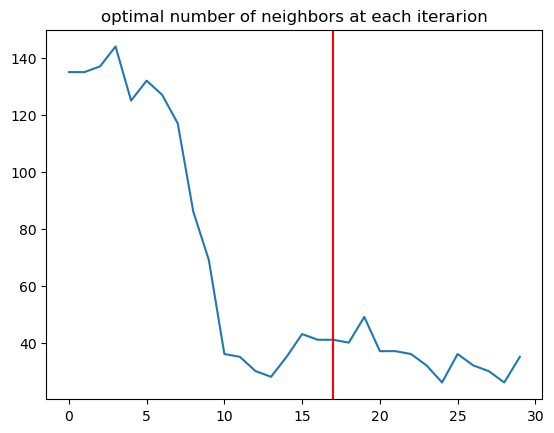

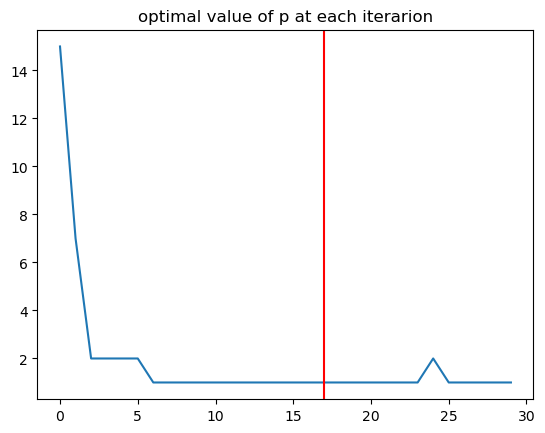

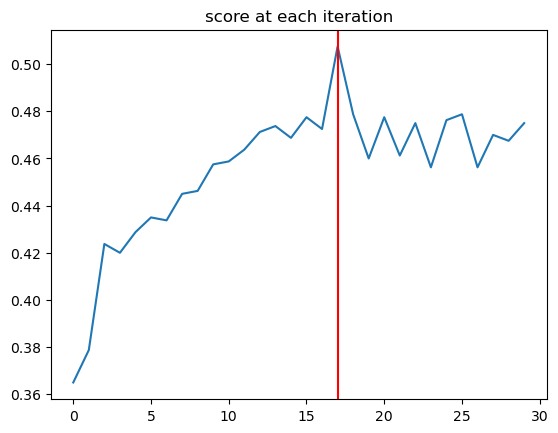

the optimal score was achieved at the 18th iteration, with 41 nearest neighbors, p equal to 1, and a score of 0.5075000000000001


In [21]:
# plot the parameters and the score in different plots
optimal_index = score_list.index(optimal_score)
plt.plot(neighbors_list)
plt.axvline(x=optimal_index, color='r')
plt.title('optimal number of neighbors at each iterarion')
plt.show()
plt.plot(p_list)
plt.axvline(x=optimal_index, color='r')
plt.title('optimal value of p at each iterarion')
plt.show()
plt.plot(score_list)
plt.axvline(x=optimal_index, color='r')
plt.title('score at each iteration')
plt.show()
print(f"the optimal score was achieved at the {optimal_index+1}th iteration, with {optimal_params['n_neighbors']} nearest neighbors, p equal to {optimal_params['p']}, and a score of {optimal_score}")

In [22]:
def print_parameters(params, score):
    print("PARAMETERS:")
    for key in params.keys():
        print(f"{key}: {params[key]}")
    print(f"SCORE: {score}")

In [23]:
print_parameters(optimal_params, optimal_score)

PARAMETERS:
n_neighbors: 41
p: 1
weights: distance
SCORE: 0.5075000000000001


Now, we fit our model with the optimal set of parameters and we compute the accuracy.

In [24]:
knn_optimal.fit(X_train, y_train)
knn_pred = knn_optimal.predict(X_test)
knn_accuracy = sklearn.metrics.accuracy_score(y_test, knn_pred)
print(f"the knn algorithm achieved an accuracy of {knn_accuracy} on the test set")

the knn algorithm achieved an accuracy of 0.505 on the test set


In [25]:
models['knn'] = knn_optimal

#### Random Forest

We continue with the Random Forest classifier. Unlike the knn algorithm, here the accuracy does not only depend on a careful choice of the hyperparameters but also in the training. We start with the optimization of hyperparameters nontheless.
* number of estimators: the number of decision trees in our forest.
* criterion: the function used to measure the quality of a split. The choice is among Gini impurity and two functions using Shannon information: entropy and log_loss.
* max_depth: the maximum depth of each tree (when equal to None, there is no max depth)
* min_samples_split: the minimum number of samples required to split an internal node
* max_features: the number of features to look at in each split.
* bootstrap: wether to use bootstrap samples or not.

There are other parameters but we will not use them for the purposes of this project.

Since it is more computationally expensive to try each combination of parameters in random forest than it is with knn, looping through multiple random searches like we did before is too expensive. In this case, first we estimate and visualize the optimal number of estimators (number of trees in our forest), and then we use a grid search with the rest of the parameters we are interested in optimizing. Obviously, we cannot test all possible values but we choose a selection of values to test on.

In [38]:
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

param_range = np.array([1, 10, 50, 100, 500, 1000])

train_scores, test_scores = sklearn.model_selection.validation_curve(
    rf,
    X_train, y_train,
    param_name='n_estimators',
    param_range=param_range,
    cv=kfold,
    n_jobs=-1
)

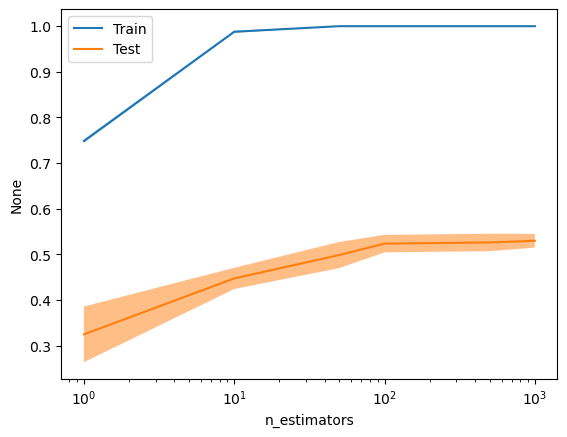

In [39]:
display = sklearn.model_selection.ValidationCurveDisplay(param_name='n_estimators', param_range=param_range, train_scores=train_scores, test_scores=test_scores)
display.plot()
plt.show()

We notice that the number of estimators influences the test accuracy, but then the curve starts to flatten at around 100 trees (notice that the x scale is logarithmic). We choose to keep 100 trees in our random forest. Now we go ahead and optimize the rest of the parameters.

In [46]:
parameter_grid = {
    'n_estimators': [100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 50, 100],
    'min_samples_split': [2, 10],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
    }
    
grid_search = sklearn.model_selection.GridSearchCV(rf, parameter_grid, n_jobs=-1, refit=True, cv=kfold, verbose=2)

grid_search.fit(X_train, y_train)

rf_best_params = grid_search.best_params_
rf_best_score = grid_search.best_score_
rf_optimal = grid_search.best_estimator_

print(rf_best_params)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, min_samples_split=10, n_estimators=100; total time=   0.

In [47]:
print_parameters(rf_best_params, rf_best_score)

PARAMETERS:
bootstrap: True
criterion: entropy
max_depth: None
max_features: None
min_samples_split: 2
n_estimators: 100
SCORE: 0.53875


As with knn, we fit the model and compute the accuracy.

In [48]:
rf_optimal.fit(X_train, y_train)
rf_pred = rf_optimal.predict(X_test)
rf_accuracy = sklearn.metrics.accuracy_score(y_test, rf_pred)
print(f"the rf algorithm achieved an accuracy of {rf_accuracy} on the test set")

the rf algorithm achieved an accuracy of 0.55 on the test set


In [49]:
models['rf'] = rf_optimal

#### Bonus: neural network

Since the data seems to have a complicated relationship not fully captured by neither knn or rf, we try to use a classifier capable of learning arbitrary functions, such as a Neural Network. In this case the hyperparameters we can tune are the shape of the neural network and the activation function. Since it becomes very computationally expensive to train neural networks as they become larger, we choose a fixed depth and keep the number of layers constant throughout the network. We then perform grid search on a restricted set of shapes and three possible activation functions: rectified linear, hyperbolic tangent and logistic.

We fix the max number of iterations to 300 to avoid running into very expensive training and use adam as the optimizer.

In [50]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(solver='adam', alpha=1e-5, random_state=1, max_iter=300, verbose=False)

depth = 5
max_n_layers = 9 #considered as the power of 2: if max_n_layers = 10, then the actual max_n_layers will be 2**10

grid_list = []

for i in range(4, max_n_layers+1):
    grid_list.append(tuple([2**i]*depth))

grid_list

[(16, 16, 16, 16, 16),
 (32, 32, 32, 32, 32),
 (64, 64, 64, 64, 64),
 (128, 128, 128, 128, 128),
 (256, 256, 256, 256, 256),
 (512, 512, 512, 512, 512)]

In [51]:
parameter_grid = {
    'hidden_layer_sizes': grid_list,
    'activation': ['tanh', 'relu', 'logistic']
}

grid_search = sklearn.model_selection.GridSearchCV(nn_model, parameter_grid, n_jobs=-1, refit=True, cv=kfold, verbose=2)

grid_search.fit(X_train, y_train)

nn_best_params = grid_search.best_params_
nn_best_score = grid_search.best_score_
nn_optimal = grid_search.best_estimator_

print(nn_best_params)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization

[CV] END activation=tanh, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.5s
[CV] END activation=tanh, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.8s


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.9s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   1.1s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128, 128, 128, 128); total time=   1.9s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128, 128, 128, 128); total time=   1.6s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128, 128, 128, 128); total time=   2.0s
[CV] END activation=tanh, hidden_layer_sizes=(128, 128, 128, 128, 128); total time=   2.0s
[CV] END activation=tanh, hidden_l

/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(256, 256, 256, 256, 256); total time=   5.5s
[CV] END activation=tanh, hidden_layer_sizes=(256, 256, 256, 256, 256); total time=   5.1s


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.5s


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.5s


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=relu, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.5s
[CV] END activation=relu, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.8s
[CV] END activation=relu, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   0.6s
[CV] END activation=relu, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   0.7s
[CV] END activation=relu, hidden_layer_sizes=(128, 128

/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(512, 512, 512, 512, 512); total time=  19.5s
[CV] END activation=tanh, hidden_layer_sizes=(512, 512, 512, 512, 512); total time=  19.6s
[CV] END activation=logistic, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.0s
[CV] END activation=logistic, hidden_layer_sizes=(16, 16, 16, 16, 16); total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.1s
[CV] END activation=logistic, hidden_layer_sizes=(32, 32, 32, 32, 32); total time=   0.1s
[CV] END

/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(128, 128, 128, 128, 128); total time=   0.3s
[CV] END activation=logistic, hidden_layer_sizes=(128, 128, 128, 128, 128); total time=   0.4s


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(64, 64, 64, 64, 64); total time=   1.7s
[CV] END activation=logistic, hidden_layer_sizes=(256, 256, 256, 256, 256); total time=   1.6s
[CV] END activation=logistic, hidden_layer_sizes=(128, 128, 128, 128, 128); total time=   3.1s
[CV] END activation=relu, hidden_layer_sizes=(512, 512, 512, 512, 512); total time=   7.0s


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(128, 128, 128, 128, 128); total time=   4.9s
[CV] END activation=relu, hidden_layer_sizes=(512, 512, 512, 512, 512); total time=   7.9s
[CV] END activation=logistic, hidden_layer_sizes=(256, 256, 256, 256, 256); total time=   6.5s
[CV] END activation=logistic, hidden_layer_sizes=(512, 512, 512, 512, 512); total time=   5.0s
[CV] END activation=logistic, hidden_layer_sizes=(512, 512, 512, 512, 512); total time=   4.4s
[CV] END activation=logistic, hidden_layer_sizes=(256, 256, 256, 256, 256); total time=  10.2s
[CV] END activation=logistic, hidden_layer_sizes=(512, 512, 512, 512, 512); total time=   5.4s
[CV] END activation=logistic, hidden_layer_sizes=(512, 512, 512, 512, 512); total time=   7.9s
[CV] END activation=logistic, hidden_layer_sizes=(512, 512, 512, 512, 512); total time=   6.8s


/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/edoardoghirardo/miniconda/envs/edo/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, hidden_layer_sizes=(256, 256, 256, 256, 256); total time=  14.2s
[CV] END activation=logistic, hidden_layer_sizes=(256, 256, 256, 256, 256); total time=  14.4s
{'activation': 'tanh', 'hidden_layer_sizes': (512, 512, 512, 512, 512)}


In [52]:
print_parameters(nn_best_params, nn_best_score)

PARAMETERS:
activation: tanh
hidden_layer_sizes: (512, 512, 512, 512, 512)
SCORE: 0.5462499999999999


As usual, we train and score our model.

In [53]:
nn_optimal.fit(X_train, y_train)

nn_pred = nn_optimal.predict(X_test)
nn_accuracy = sklearn.metrics.accuracy_score(y_test, nn_pred)
print(f"the nn algorithm achieved an accuracy of {nn_accuracy} on the test set")

the nn algorithm achieved an accuracy of 0.54 on the test set


In [54]:
models['nn'] = nn_optimal

Lastly, we save our models to avoid having to run the training again.

In [55]:
for name in models.keys():
    model = models[name]
    with open(f'{name}_model.pkl', 'wb') as file:
        pickle.dump(model, file)

### Model selection

We can import our models again (in case we want to avoid re-running the previous code)

In [30]:
names = ['knn', 'rf', 'nn']
models = {}

for name in names:
    with open(f'{name}_model.pkl', 'rb') as file:
        model = pickle.load(file)
        models[name] = model

We define a function to plot the confusion matrix of a given prediction set.

In [57]:
def plot_confusion_matrix(confusion_matrix, name):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

We summarize the accuracy of each model.

SUMMARY OF knn


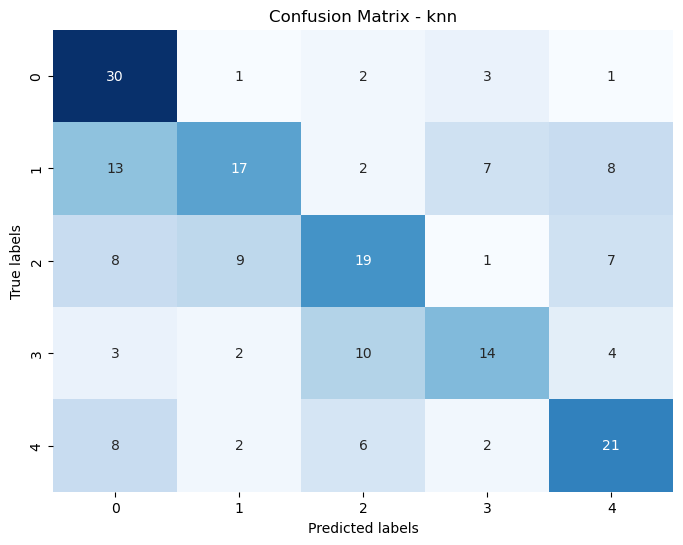

              precision    recall  f1-score   support

           0       0.48      0.81      0.61        37
           1       0.55      0.36      0.44        47
           2       0.49      0.43      0.46        44
           3       0.52      0.42      0.47        33
           4       0.51      0.54      0.53        39

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.51      0.51      0.49       200

SUMMARY OF rf


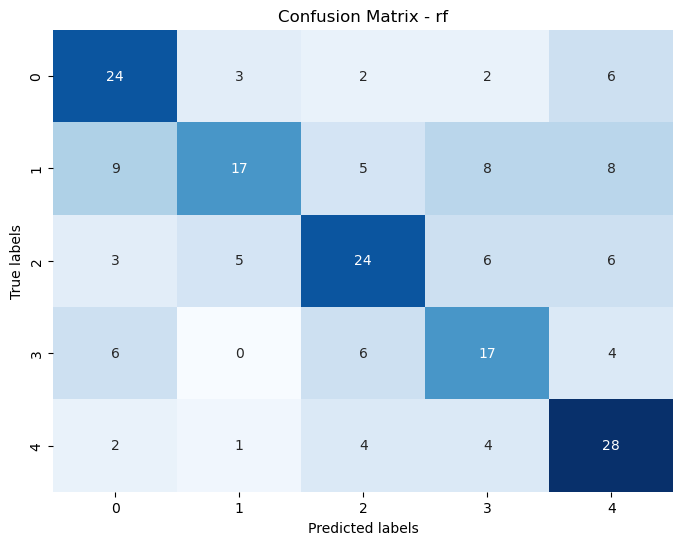

              precision    recall  f1-score   support

           0       0.55      0.65      0.59        37
           1       0.65      0.36      0.47        47
           2       0.59      0.55      0.56        44
           3       0.46      0.52      0.49        33
           4       0.54      0.72      0.62        39

    accuracy                           0.55       200
   macro avg       0.56      0.56      0.54       200
weighted avg       0.56      0.55      0.54       200

SUMMARY OF nn


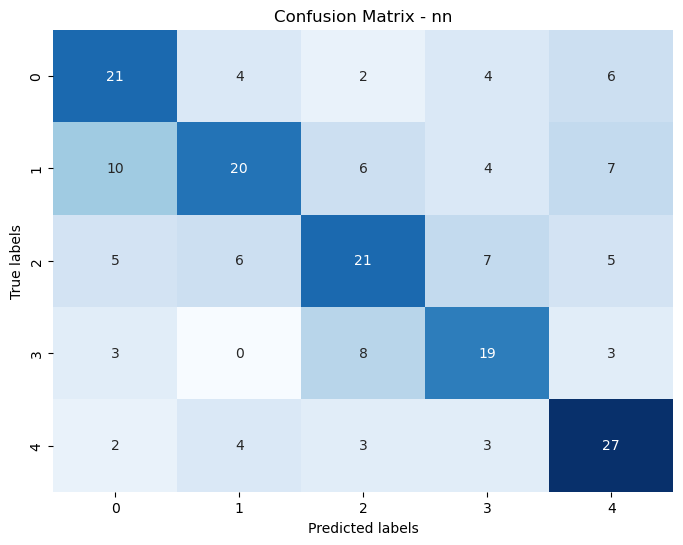

              precision    recall  f1-score   support

           0       0.51      0.57      0.54        37
           1       0.59      0.43      0.49        47
           2       0.53      0.48      0.50        44
           3       0.51      0.58      0.54        33
           4       0.56      0.69      0.62        39

    accuracy                           0.54       200
   macro avg       0.54      0.55      0.54       200
weighted avg       0.54      0.54      0.54       200



In [58]:
for name in models.keys():
    print(f'SUMMARY OF {name}')
    pred = models[name].predict(X_test)
    conf_mat = sklearn.metrics.confusion_matrix(y_test, pred)
    plot_confusion_matrix(conf_mat, name)
    print(sklearn.metrics.classification_report(y_test, pred))

Excluding the neural network, which was tried as a bonus, the Random Forest classifier seems to work better than K-nearest neighbors. We will use that model for the prediction.

Now, we try one last thing which is to build an ensemble voting model of our 3 models. This is not expected to work well as the accuracy of the three models is not high. With our small dataset of random data, as well as by using only 3 models, this ensemble method is likely to pick up noise rather than actual patterns in the data. Nontheless, we implement it to see if it can surprise us with an improved accuracy.

In [59]:
class Ensemble():
    def __init__(self, models):
        self.models = models

    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models.values()])
        return np.mean(predictions, axis=1).astype(int)

    def score(self, X, y):
        return sklearn.metrics.accuracy_score(y, self.predict(X))

In [60]:
ensemble_model = Ensemble(models)

ensemble_pred = ensemble_model.predict(X_test)
ensemble_accuracy = sklearn.metrics.accuracy_score(y_test, ensemble_pred)
print(f"the ensemble algorithm achieved an accuracy of {ensemble_accuracy} on the test set")

the ensemble algorithm achieved an accuracy of 0.45 on the test set


As expected, this model is no better than any of the individual ones. We will not use it for our predictions.

### Predictions

We start by importing the data and rescaling it the same way we rescaled the training data.

In [70]:
df_test = pd.read_csv('mldata_0003185254.TEST_FEATURES.csv')
df_test = df_test.drop(df_test.columns[0], axis=1)

with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

normalized_df_test= pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
normalized_df_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25
0,0.058912,1.137775,0.549369,0.444938,0.488894,1.022881,-0.742047,0.409934,0.512242,-1.197170,...,-0.316302,-0.197319,0.957136,-1.519013,-0.522007,0.488894,0.439564,0.381785,0.931864,1.275596
1,0.876063,-0.033322,-0.992003,0.064920,2.089704,1.413447,-0.346541,0.638883,0.665099,-0.884830,...,-1.362422,-2.207784,0.193238,-0.629529,-2.349490,2.089704,-1.359715,0.366485,1.619442,0.701307
2,0.406462,-0.580052,1.266293,0.228867,-1.306989,-1.448075,0.100911,-1.121694,0.775270,0.000035,...,-0.155322,0.731002,0.017549,-1.019581,0.146020,-1.306989,0.836220,-0.221417,0.648654,-0.520609
3,0.213942,1.119832,0.371531,-1.655925,0.032771,-1.548453,-0.642639,0.810800,-0.530207,0.205434,...,-1.871435,1.025674,2.107597,1.473940,-0.867806,0.032771,0.383630,0.345889,-1.664287,-1.228035
4,-0.540074,-0.154443,-0.597849,0.275849,-1.805368,-1.636860,0.931803,-0.595895,-0.816755,0.934602,...,0.183920,0.785906,0.051538,1.388881,-0.100559,-1.805368,1.276375,0.154446,-0.135656,-0.528009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.111076,0.305591,0.744935,-0.147607,0.430178,1.534618,-0.720048,0.503502,-0.006866,-0.724033,...,0.870487,-0.113055,-0.410454,0.262637,1.883614,0.430178,-0.006357,-0.225844,2.390521,1.425235
996,-0.301287,-0.883061,0.633498,-0.376153,2.495866,1.909860,-1.404631,-0.078073,0.522709,0.346944,...,1.083683,1.332317,-1.735806,-0.320953,0.262809,2.495866,-0.742701,-0.095928,0.795583,-1.724501
997,1.299821,0.131862,-0.390972,-0.293005,0.762248,-0.786797,0.611447,0.119948,0.774483,0.200810,...,0.434316,-1.858289,0.287098,-0.773465,1.181762,0.762248,-1.958380,-0.006099,0.120589,0.491528
998,0.883273,1.154728,-0.599006,-0.016182,1.199197,-2.166481,1.279324,1.387834,-0.521001,-0.471105,...,-0.514548,-1.904173,1.440807,-1.951621,-0.111415,1.199197,-0.899362,0.314221,1.682687,-0.756048


Since we have already chosen the model to use and want to use it on new data, we can refit the Random Forest on the whole dataset rather than the train one.

In [71]:
rf_optimal.fit(X, y)

RandomForestClassifier(criterion='entropy', max_features=None, n_jobs=-1,
                       random_state=1)

We now compute our predictions.

In [72]:
rf_pred = rf_optimal.predict(normalized_df_test)
rf_pred

array([3, 0, 3, 0, 2, 4, 0, 4, 0, 0, 1, 0, 1, 0, 0, 1, 3, 0, 3, 0, 1, 0,
       2, 1, 1, 0, 0, 2, 2, 2, 4, 0, 0, 3, 1, 1, 3, 3, 2, 4, 2, 3, 4, 1,
       1, 1, 1, 4, 1, 3, 4, 4, 1, 4, 1, 3, 2, 2, 0, 1, 2, 1, 2, 0, 3, 4,
       0, 1, 2, 1, 1, 3, 4, 0, 2, 3, 2, 1, 4, 4, 2, 0, 3, 1, 4, 1, 3, 2,
       3, 1, 2, 3, 0, 0, 2, 2, 0, 4, 1, 1, 2, 4, 1, 4, 2, 0, 3, 3, 0, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 4, 1, 2, 4, 0, 0, 2, 4, 3, 4, 3, 1,
       3, 2, 4, 2, 3, 3, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 3, 2, 2, 3, 1, 2,
       4, 2, 1, 1, 4, 1, 0, 2, 3, 3, 1, 0, 1, 1, 4, 0, 0, 3, 3, 4, 2, 2,
       3, 1, 0, 4, 0, 1, 4, 1, 3, 4, 0, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 3,
       3, 4, 4, 4, 4, 1, 1, 1, 2, 4, 2, 3, 4, 4, 0, 2, 1, 0, 0, 4, 2, 4,
       2, 3, 4, 0, 0, 3, 0, 2, 4, 2, 2, 0, 3, 0, 2, 3, 4, 3, 1, 4, 1, 4,
       1, 0, 1, 2, 4, 0, 1, 2, 3, 2, 0, 2, 1, 4, 3, 2, 1, 2, 4, 0, 2, 4,
       3, 0, 2, 3, 0, 1, 2, 0, 4, 3, 0, 1, 3, 0, 3, 2, 4, 0, 3, 4, 2, 4,
       0, 3, 4, 4, 4, 0, 1, 0, 2, 3, 1, 3, 1, 0, 4,

Lastly, we save the predictions as txt.

In [73]:
with open('test_predictions.txt', 'w') as file:
    for pred in rf_pred:
        file.write(f"{pred}\n")